In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# LOAD

L'idea è quella di raggruppare in un'unica funzione il contenuto del file [load_pre_processing_single](load_pre_processing_single.ipynb) e di utilizzarla su tutti i csv presenti nella cartella dei carichi (sperando che non esploda tutto) in modo da poter creare un profilo aggregato

In [2]:
def function(filename, bins):
    df = pd.read_csv(path_root + filename)
    df.drop(columns = ['reactive_power', 'apparent_power', 'current', 'voltage'])
    df['timestamp'] = df['timestamp'].str.rsplit('-', 1, expand=True)[0]
    df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)
    df['date'] = df['timestamp'].dt.date
    df['t'] = pd.cut(df['timestamp'].dt.strftime('%H%M%S').astype(int), bins=bins, labels=False)
    df = df.groupby(['date','t']).sum()
    df = df.reset_index().pivot(index='date', columns='t', values='active_power')
    df[df < 0] = 0
    df.dropna(inplace=True)
    df.to_csv('Profili/{}'.format(filename))
    np.save('Profili/{}.npy'.format(filename.split('.')[0]), df.to_numpy())
    return df

Definisco il path dal quale andare a prendere i profili

In [3]:
path_root = 'Profili/Carichi/Appliances/'

Definizione degli intervalli da passare alla cut dentro la funzione

In [4]:
intervals = pd.date_range("00:00:00", "23:59:59", freq="15min")
intervals = intervals.to_series()
intervals = intervals.dt.strftime('%H%M%S').astype(int)
intervals = intervals.append(pd.Series(['240000']).astype(int))

In [5]:
directory = os.fsencode(path_root)

In [6]:
i = 0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if i == 0:
        result = function(filename, intervals)
        i += 1
    else:
        r = function(filename, intervals)
        result = result.add(r, fill_value=0)

In [7]:
result

t                   0.0           1.0           2.0           3.0   \
date                                                                 
2017-10-31  1.610316e+08  1.430979e+08  1.600317e+08  1.624594e+08   
2017-11-01  1.583498e+08  1.218105e+08  1.495238e+08  1.325579e+08   
2017-11-03  4.126700e+01  1.944156e+01  2.301704e+00  6.921665e+01   
2017-11-05  1.771521e+02  1.560664e+02  1.746036e+02  2.009095e+02   
2017-11-07  1.547073e+08  1.531869e+08  1.395210e+08  9.005727e+07   
2017-11-10  1.617827e+08  1.624417e+08  1.626572e+08  1.641087e+08   
2017-11-12  1.285688e+02  2.088011e+01  1.767409e+01  1.948257e+01   
2017-12-03  3.138593e+02  3.304647e+02  3.851311e+02  3.270943e+02   
2017-12-12  1.587724e+08  1.586688e+08  9.312486e+07  8.823520e+07   
2017-12-13  7.884657e+07  8.182127e+07  4.925325e+07  4.240457e+07   
2017-12-22  1.505911e+08  1.526994e+08  1.627708e+08  1.630998e+08   
2017-12-23  1.660780e+08  1.602615e+08  1.608008e+08  1.641019e+08   
2017-12-24  1.620395e+08  1.473046e+08  1.553385e+08  1.633062e+08   
2017-12-25  0.000000e+00  4.274668e+00  9.946862e+00  3.781445e+00   
2017-12-26  1.624562e+08  1.629215e+08  1.638343e+08  1.634287e+08   
2017-12-29  1.341198e+08  1.620084e+08  1.621769e+08  1.625763e+08   
2017-12-30  1.074286e+08  1.632733e+08  1.590743e+08  1.700329e+08   
2017-12-31  1.918478e+08  1.632218e+08  1.902982e+08  6.744995e+07   
2018-01-01  1.475582e+02  2.083900e+02  2.100342e+02  2.076092e+02   
2018-01-02  2.837722e+02  3.610860e+02  3.621136e+02  3.184628e+02   
2018-01-03  1.663276e+08  1.657412e+08  1.661281e+08  1.652963e+08   
2018-01-11  1.584680e+08  1.354542e+08  5.623105e+07  1.426864e+08   
2018-01-12  1.593027e+08  1.602841e+08  1.607091e+08  1.604876e+08   
2018-01-13  6.187319e+07  6.887629e+07  1.247734e+08  1.372620e+08   
2018-01-14  1.477398e+08  1.545564e+08  1.454257e+08  1.592726e+08   
2018-01-15  4.142318e+02  4.304263e+02  4.376191e+02  4.052714e+02   
2018-01-16  1.629102e+08  1.618642e+08  1.618542e+08  1.615292e+08   
2018-01-17  1.619233e+08  1.626615e+08  1.632502e+08  1.632584e+08   
2018-01-18  1.638231e+08  1.638115e+08  1.642668e+08  1.642785e+08   
2018-01-19  1.676053e+08  1.659525e+08  1.654840e+08  1.643049e+08   
2018-01-20  8.045461e+07  8.050807e+07  8.027773e+07  8.028231e+07   
2018-01-30  1.258127e+08  1.373373e+08  1.564491e+08  1.568360e+08   
2018-02-20  2.539484e+07  2.521297e+07  5.638889e+06  1.180096e+07   
2018-02-21  2.277842e+08  2.017900e+08  1.895319e+08  1.887818e+08   
2018-02-22  2.315486e+08  2.028477e+08  2.429109e+08  2.255577e+08   
2018-02-23  6.162693e+07  6.579177e+07  6.245545e+07  6.944215e+07   
2018-02-24  6.496283e+07  6.505514e+07  6.860747e+07  4.033626e+07   
2018-02-25  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2018-02-26  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2018-02-27  1.136889e+05  1.640308e+05  1.081182e+05  1.667047e+05   
2018-03-27  2.208461e+08  2.223012e+08  2.238617e+08  2.037157e+08   
2018-03-28  2.355809e+08  2.373302e+08  2.343803e+08  2.354887e+08   
2018-03-29  2.146113e+08  2.038058e+08  1.743512e+08  1.192065e+08   
2018-03-30  2.319319e+08  2.349301e+08  2.354549e+08  2.393928e+08   
2018-03-31  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2018-04-01  1.867547e+08  7.154177e+07  2.671531e+07  8.231428e+07   
2018-04-02  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

t                   4.0           5.0           6.0           7.0   \
date                                                                 
2017-10-31  1.621839e+08  1.612295e+08  1.403776e+08  4.888996e+07   
2017-11-01  1.614373e+08  1.636780e+08  8.543017e+07  5.194185e+07   
2017-11-03  3.288203e+00  1.183751e+01  8.219290e-02  0.000000e+00   
2017-11-05  1.055515e+02  8.027325e+01  6.350346e+01  1.969636e+02   
2017-11-07  9.381818e+07  1.170596e+08  1.558280e+08  1.336112e+08   
2017-11-10  1.619899e+08  1.581194e+08  1.619311e+08  1.615553e+08   
2017-11-1

In [8]:
result.min(axis=1, skipna=False).isna().sum()

0

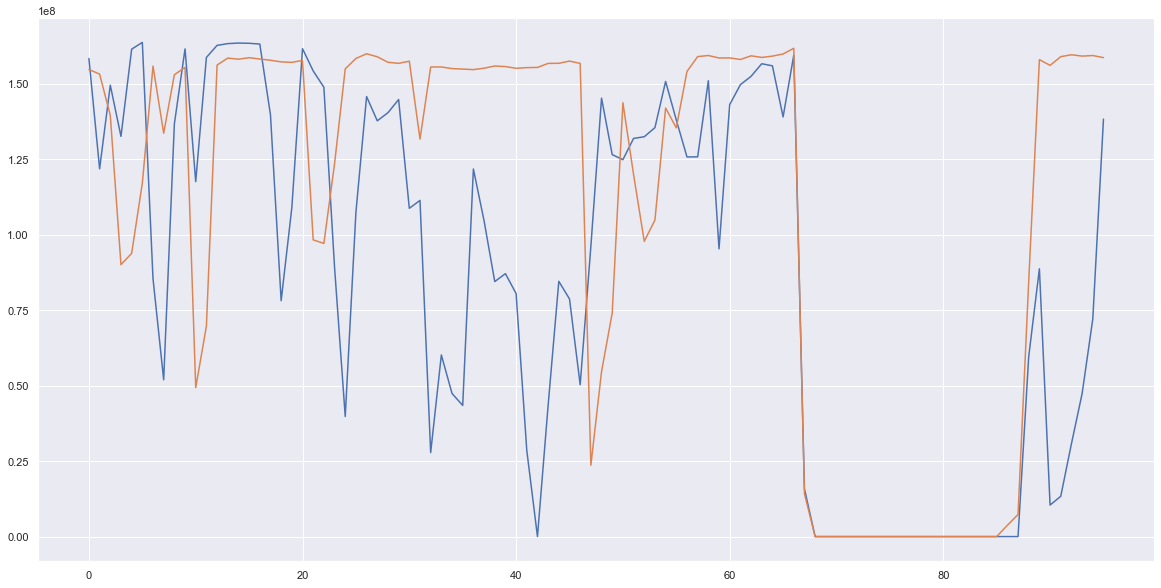

In [9]:
plt.figure(figsize=(20,10))
plt.plot(result.iloc[1, :])
plt.plot(result.iloc[4, :])

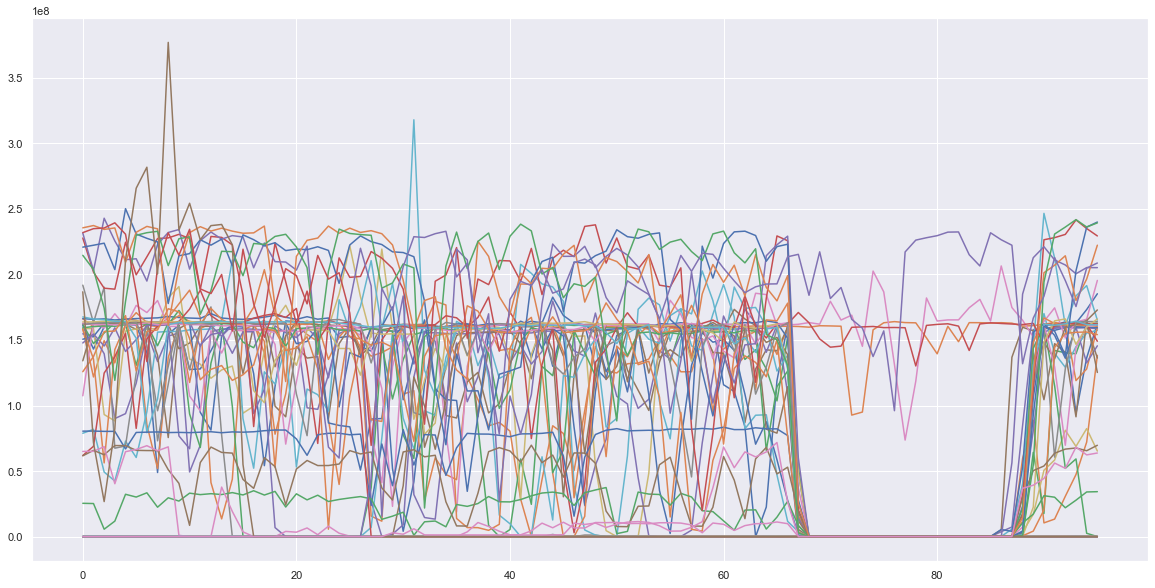

In [10]:
plt.figure(figsize=(20,10))
for i, (index, row) in enumerate(result.iterrows()):
    plt.plot(row)

In [11]:
result.dropna()

t                   0.0           1.0           2.0           3.0   \
date                                                                 
2017-10-31  1.610316e+08  1.430979e+08  1.600317e+08  1.624594e+08   
2017-11-01  1.583498e+08  1.218105e+08  1.495238e+08  1.325579e+08   
2017-11-03  4.126700e+01  1.944156e+01  2.301704e+00  6.921665e+01   
2017-11-05  1.771521e+02  1.560664e+02  1.746036e+02  2.009095e+02   
2017-11-07  1.547073e+08  1.531869e+08  1.395210e+08  9.005727e+07   
2017-11-10  1.617827e+08  1.624417e+08  1.626572e+08  1.641087e+08   
2017-11-12  1.285688e+02  2.088011e+01  1.767409e+01  1.948257e+01   
2017-12-03  3.138593e+02  3.304647e+02  3.851311e+02  3.270943e+02   
2017-12-12  1.587724e+08  1.586688e+08  9.312486e+07  8.823520e+07   
2017-12-13  7.884657e+07  8.182127e+07  4.925325e+07  4.240457e+07   
2017-12-22  1.505911e+08  1.526994e+08  1.627708e+08  1.630998e+08   
2017-12-23  1.660780e+08  1.602615e+08  1.608008e+08  1.641019e+08   
2017-12-24  1.620395e+08  1.473046e+08  1.553385e+08  1.633062e+08   
2017-12-25  0.000000e+00  4.274668e+00  9.946862e+00  3.781445e+00   
2017-12-26  1.624562e+08  1.629215e+08  1.638343e+08  1.634287e+08   
2017-12-29  1.341198e+08  1.620084e+08  1.621769e+08  1.625763e+08   
2017-12-30  1.074286e+08  1.632733e+08  1.590743e+08  1.700329e+08   
2017-12-31  1.918478e+08  1.632218e+08  1.902982e+08  6.744995e+07   
2018-01-01  1.475582e+02  2.083900e+02  2.100342e+02  2.076092e+02   
2018-01-02  2.837722e+02  3.610860e+02  3.621136e+02  3.184628e+02   
2018-01-03  1.663276e+08  1.657412e+08  1.661281e+08  1.652963e+08   
2018-01-11  1.584680e+08  1.354542e+08  5.623105e+07  1.426864e+08   
2018-01-12  1.593027e+08  1.602841e+08  1.607091e+08  1.604876e+08   
2018-01-13  6.187319e+07  6.887629e+07  1.247734e+08  1.372620e+08   
2018-01-14  1.477398e+08  1.545564e+08  1.454257e+08  1.592726e+08   
2018-01-15  4.142318e+02  4.304263e+02  4.376191e+02  4.052714e+02   
2018-01-16  1.629102e+08  1.618642e+08  1.618542e+08  1.615292e+08   
2018-01-17  1.619233e+08  1.626615e+08  1.632502e+08  1.632584e+08   
2018-01-18  1.638231e+08  1.638115e+08  1.642668e+08  1.642785e+08   
2018-01-19  1.676053e+08  1.659525e+08  1.654840e+08  1.643049e+08   
2018-01-20  8.045461e+07  8.050807e+07  8.027773e+07  8.028231e+07   
2018-01-30  1.258127e+08  1.373373e+08  1.564491e+08  1.568360e+08   
2018-02-20  2.539484e+07  2.521297e+07  5.638889e+06  1.180096e+07   
2018-02-21  2.277842e+08  2.017900e+08  1.895319e+08  1.887818e+08   
2018-02-22  2.315486e+08  2.028477e+08  2.429109e+08  2.255577e+08   
2018-02-23  6.162693e+07  6.579177e+07  6.245545e+07  6.944215e+07   
2018-02-24  6.496283e+07  6.505514e+07  6.860747e+07  4.033626e+07   
2018-02-25  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2018-02-26  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2018-02-27  1.136889e+05  1.640308e+05  1.081182e+05  1.667047e+05   
2018-03-27  2.208461e+08  2.223012e+08  2.238617e+08  2.037157e+08   
2018-03-28  2.355809e+08  2.373302e+08  2.343803e+08  2.354887e+08   
2018-03-29  2.146113e+08  2.038058e+08  1.743512e+08  1.192065e+08   
2018-03-30  2.319319e+08  2.349301e+08  2.354549e+08  2.393928e+08   
2018-03-31  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2018-04-01  1.867547e+08  7.154177e+07  2.671531e+07  8.231428e+07   
2018-04-02  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

t                   4.0           5.0           6.0           7.0   \
date                                                                 
2017-10-31  1.621839e+08  1.612295e+08  1.403776e+08  4.888996e+07   
2017-11-01  1.614373e+08  1.636780e+08  8.543017e+07  5.194185e+07   
2017-11-03  3.288203e+00  1.183751e+01  8.219290e-02  0.000000e+00   
2017-11-05  1.055515e+02  8.027325e+01  6.350346e+01  1.969636e+02   
2017-11-07  9.381818e+07  1.170596e+08  1.558280e+08  1.336112e+08   
2017-11-10  1.619899e+08  1.581194e+08  1.619311e+08  1.615553e+08   
2017-11-1

##### Export to csv

In [12]:
result.to_csv('Profili/processed_aggregated_load.csv')

In [13]:
np.save('Profili/processed_aggregated_load.npy', result.to_numpy())